In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
!ls ../ex2

costFunction.m         ex2data2.txt           predict.m
costFunctionReg.m      lib                    sigmoid.m
ex2.m                  mapFeature.m           submit.m
ex2_reg.m              plotData.m
ex2data1.txt           plotDecisionBoundary.m


In [7]:
dat1 = pd.read_csv('../ex2/ex2data1.txt', 
                   header=None, 
                   names=['exam1', 'exam2', 'admitted'])
dat1.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


# 1.1 Visualization of the data

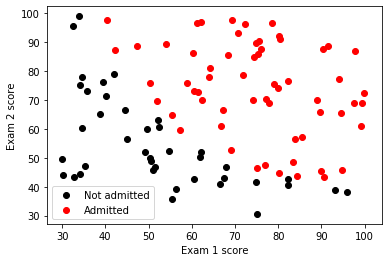

In [16]:
plt.scatter(dat1.exam1[dat1.admitted == 0], 
            dat1.exam2[dat1.admitted == 0], 
            c='k', 
            label='Not admitted')
plt.scatter(dat1.exam1[dat1.admitted == 1], 
            dat1.exam2[dat1.admitted == 1], 
            c='r',
            label='Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend();

# 1.2 Implementation
## 1.2.1 Sigmoid Function

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

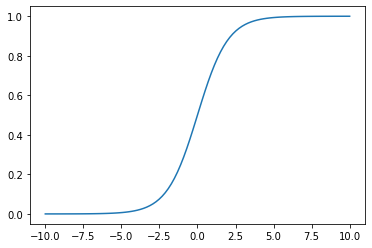

In [25]:
# Test
z = np.linspace(-10, 10, 100)
sig = [sigmoid(x) for x in z]
plt.plot(z, sig);

In [40]:
def predict(theta, X):
    return sigmoid(X @ theta.T)

In [43]:
def log_loss(theta, X, y):
    m = X.shape[0]
    preds = predict(theta, X)
    loss = (-y*np.log(preds) - (1 - y)*log(1 - preds)).sum() / m
    return loss

In [ ]:
def d_log_loss(theta, X, y):
    m = X.shape[0]
    preds = predict(theta, X)
    grad = (preds - y)